In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import pandas_datareader
import seaborn as sns

In [4]:
PL = pd.read_csv('season-1819.csv')

PL

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HY,AY,HR,AR
0,E0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,2,1,0,0
1,E0,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,1,1,0,0
2,E0,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,1,2,0,0
3,E0,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,2,1,0,0
4,E0,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,2,2,0,0
5,E0,11/8/2018,Watford,Brighton,2,0,H,1,0,H,J Moss,19,6,5,0,2,2,0,0
6,E0,11/8/2018,Wolves,Everton,2,2,D,1,1,D,C Pawson,11,6,4,5,0,1,0,1
7,E0,12/8/2018,Arsenal,Man City,0,2,A,0,1,A,M Oliver,9,17,3,8,2,2,0,0
8,E0,12/8/2018,Liverpool,West Ham,4,0,H,2,0,H,A Taylor,18,5,8,2,1,2,0,0
9,E0,12/8/2018,Southampton,Burnley,0,0,D,0,0,D,G Scott,18,16,3,6,0,1,0,0


In [302]:
PL['TY'] = PL['HY'] + PL['AY'] 
PL['TR'] = PL['HR'] + PL['AR'] 
PL['TC'] = PL['TY'] + PL['TR'] 
PL['TG'] = PL['FTHG'] + PL['FTAG'] 
PL['HTTG'] = PL['HTHG'] + PL['HTAG'] 
PL['TST'] = PL['HST'] + PL['AST'] 

#New Statistics in case i may need them
#TY: total yellows
#TR: total reds
#TC: total cards
#TG: total goals 
#HTTG: half time total goals 
#TST: total shots on target



PL

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
0,E0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,...,1,0,0,3,0,3,3,1,10,Man United
1,E0,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1,0,0,2,0,2,2,1,5,Bournemouth
2,E0,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2,0,0,3,0,3,2,1,15,Crystal Palace
3,E0,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,0,0,3,0,3,3,2,5,Chelsea
4,E0,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,0,0,4,0,4,3,3,7,Tottenham
5,E0,11/8/2018,Watford,Brighton,2,0,H,1,0,H,...,2,0,0,4,0,4,2,1,5,Watford
6,E0,11/8/2018,Wolves,Everton,2,2,D,1,1,D,...,1,0,1,1,1,2,4,2,9,Draw
7,E0,12/8/2018,Arsenal,Man City,0,2,A,0,1,A,...,2,0,0,4,0,4,2,1,11,Man City
8,E0,12/8/2018,Liverpool,West Ham,4,0,H,2,0,H,...,2,0,0,3,0,3,4,2,10,Liverpool
9,E0,12/8/2018,Southampton,Burnley,0,0,D,0,0,D,...,1,0,0,1,0,1,0,0,9,Draw


In [301]:
PLRef1 = PL.groupby('Referee').mean()
PLRef1[['TY', 'TR', 'TC']]

#interesting table to see the average total cards given by refs in a game

,TY,TR,TC
Referee,,,
A Madley,1.000000,0.000000,1.000000
A Marriner,2.703704,0.111111,2.814815
A Taylor,3.187500,0.031250,3.218750
C Kavanagh,3.083333,0.083333,3.166667
C Pawson,3.538462,0.269231,3.807692
D Coote,3.181818,0.000000,3.181818
G Scott,2.235294,0.058824,2.294118
J Moss,3.444444,0.185185,3.629630
K Friend,3.407407,0.111111,3.518519


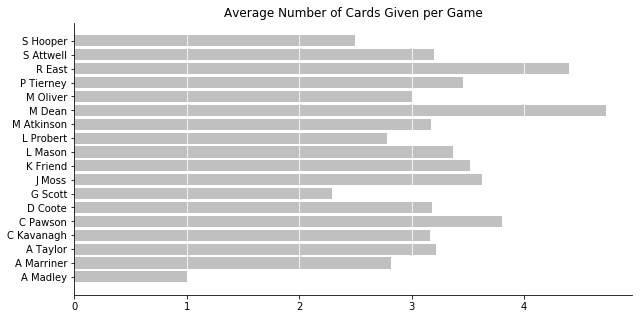

In [300]:
fig, ax = plt.subplots(figsize=(10,5))


ax.barh(PLRef1.index, PLRef1['TC'], color='silver')      
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Average Number of Cards Given per Game')

#harshness of referees bar plot

plt.show()

In [298]:
PL['Referee'].value_counts()
#how many games each referee was in charge of

A Taylor      32
M Oliver      30
M Dean        29
M Atkinson    29
A Marriner    27
K Friend      27
J Moss        27
C Pawson      26
C Kavanagh    24
P Tierney     24
S Attwell     20
L Mason       19
L Probert     18
G Scott       17
D Coote       11
R East        10
S Hooper       8
A Madley       2
Name: Referee, dtype: int64

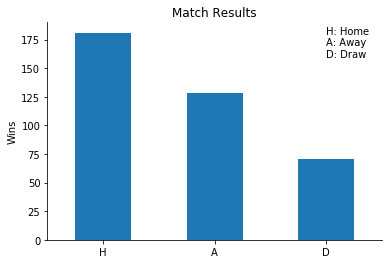

In [272]:


fig, ax = plt.subplots()
PL['FTR'].value_counts().plot(ax=ax, kind='bar')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation='horizontal')

ax.text(2,180, 'H: Home')            
ax.text(2,170, 'A: Away')
ax.text(2,160, 'D: Draw')

#bar graph showing the total number of wins for the home, away team


ax.set_ylabel('Wins')
ax.set_title('Match Results')

plt.show()

In [297]:
PL['FTR'].value_counts()
#exact value counts of the table above

H    181
A    128
D     71
Name: FTR, dtype: int64

In [103]:
def f(PL):
    if PL['FTR'] == 'D':
        val = 'Draw'
    elif PL['FTR'] == 'H':
        val = PL['HomeTeam']    
    elif PL['FTR'] == 'A':
        val = PL['AwayTeam']   
    else:
        val = -1
    return val

In [296]:
PL['Result'] = PL.apply(f, axis=1)

#In order to see who won, i came up with  a function that changes the 'FTR' -full time result-, from H/D/A to the actual name


In [293]:
PL

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
0,E0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,...,1,0,0,3,0,3,3,1,10,Man United
1,E0,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1,0,0,2,0,2,2,1,5,Bournemouth
2,E0,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2,0,0,3,0,3,2,1,15,Crystal Palace
3,E0,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,0,0,3,0,3,3,2,5,Chelsea
4,E0,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,0,0,4,0,4,3,3,7,Tottenham
5,E0,11/8/2018,Watford,Brighton,2,0,H,1,0,H,...,2,0,0,4,0,4,2,1,5,Watford
6,E0,11/8/2018,Wolves,Everton,2,2,D,1,1,D,...,1,0,1,1,1,2,4,2,9,Draw
7,E0,12/8/2018,Arsenal,Man City,0,2,A,0,1,A,...,2,0,0,4,0,4,2,1,11,Man City
8,E0,12/8/2018,Liverpool,West Ham,4,0,H,2,0,H,...,2,0,0,3,0,3,4,2,10,Liverpool
9,E0,12/8/2018,Southampton,Burnley,0,0,D,0,0,D,...,1,0,0,1,0,1,0,0,9,Draw


In [267]:
PLRefs1 = PL.groupby(['Referee'])[['HY', 'AY', 'HR', 'AR', 'TC']].sum()
PLRefs2 = PL.groupby(['Referee'])[['Referee']].count()
PLRefs3 = pd.merge(PLRefs1, PLRefs2, left_index=True, right_index=True)


PLRefs3 = PLRefs3.rename(columns={'Referee':'Games', 'HY':'Home Yellows', 'AY': 'Away Yellows'})



In [292]:
PLRefs3['Cards/Game'] = PLRefs3['TC'] / PLRefs3['Games']
PLRefs3

#Referee Statistics

,Home Yellows,Away Yellows,HR,AR,TC,Games,Cards/Game
Referee,,,,,,,
A Madley,0,2,0,0,2,2,1.000000
A Marriner,31,42,2,1,76,27,2.814815
A Taylor,57,45,0,1,103,32,3.218750
C Kavanagh,39,35,1,1,76,24,3.166667
C Pawson,46,46,1,6,99,26,3.807692
D Coote,16,19,0,0,35,11,3.181818
G Scott,14,24,0,1,39,17,2.294118
J Moss,44,49,3,2,98,27,3.629630
K Friend,48,44,2,1,95,27,3.518519


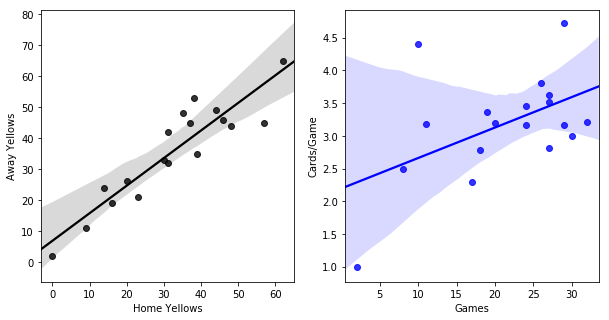

In [270]:
my_fig, my_ax = plt.subplots(1,2, figsize=(10,5)) 

sns.regplot(x='Home Yellows',                                       
            y='Away Yellows',                                     
            data=PLRefs3,    # the data
            ax = my_ax[0],                                       
            color = 'black',                                  
            ci = 99) 

sns.regplot(x='Games',                                        
            y='Cards/Game',                                      
            data=PLRefs3,    # the data
            ax = my_ax[1],                                        
            color = 'blue',                                  
            ci = 99) 


plt.show()

In [278]:
PL[ (PL['HTR']=='A') & (PL['FTR']=='H')] 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
74,E0,6/10/2018,Man United,Newcastle,3,2,H,0,2,A,...,2,0,0,4,0,4,5,2,18,Man United
130,E0,30/11/2018,Cardiff,Wolves,2,1,H,0,1,A,...,2,0,0,3,0,3,3,1,7,Cardiff
137,E0,2/12/2018,Arsenal,Tottenham,4,2,H,1,2,A,...,3,0,1,6,1,7,6,3,13,Arsenal
149,E0,5/12/2018,Wolves,Chelsea,2,1,H,0,1,A,...,4,0,0,8,0,8,3,1,5,Wolves
157,E0,8/12/2018,West Ham,Crystal Palace,3,2,H,0,1,A,...,2,0,0,3,0,3,5,1,10,West Ham
222,E0,19/01/2019,Liverpool,Crystal Palace,4,3,H,0,1,A,...,1,1,0,1,1,2,7,1,12,Liverpool
231,E0,29/01/2019,Fulham,Brighton,4,2,H,0,2,A,...,3,0,0,5,0,5,6,2,13,Fulham
234,E0,29/01/2019,Newcastle,Man City,2,1,H,0,1,A,...,3,0,0,5,0,5,3,1,6,Newcastle
239,E0,30/01/2019,Tottenham,Watford,2,1,H,0,1,A,...,4,0,0,4,0,4,3,1,4,Tottenham
282,E0,2/3/2019,Man United,Southampton,3,2,H,0,1,A,...,1,0,0,3,0,3,5,1,9,Man United


In [279]:
PL[ (PL['HTR']=='A')]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
2,E0,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2,0,0,3,0,3,2,1,15,Crystal Palace
3,E0,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,0,0,3,0,3,3,2,5,Chelsea
4,E0,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,0,0,4,0,4,3,3,7,Tottenham
7,E0,12/8/2018,Arsenal,Man City,0,2,A,0,1,A,...,2,0,0,4,0,4,2,1,11,Man City
19,E0,20/08/2018,Crystal Palace,Liverpool,0,2,A,0,1,A,...,1,1,0,2,1,3,2,1,8,Liverpool
30,E0,1/9/2018,Brighton,Fulham,2,2,D,0,1,A,...,3,0,0,6,0,6,4,1,10,Draw
34,E0,1/9/2018,Leicester,Liverpool,1,2,A,0,2,A,...,2,0,0,5,0,5,3,2,9,Liverpool
37,E0,2/9/2018,Burnley,Man United,0,2,A,0,2,A,...,3,0,1,5,1,6,2,2,11,Man United
42,E0,15/09/2018,Huddersfield,Crystal Palace,0,1,A,0,1,A,...,2,0,0,3,0,3,1,1,4,Crystal Palace
45,E0,15/09/2018,Tottenham,Liverpool,1,2,A,0,1,A,...,0,0,0,0,0,0,3,1,13,Liverpool


In [140]:
PLH = PL.groupby(['HomeTeam'])[['FTHG', 'HTHG']].sum()
PLA = PL.groupby(['AwayTeam'])[['FTAG', 'HTAG']].sum()
PLHA = pd.merge(PLH, PLA, left_index=True, right_index=True)


In [242]:
PLHA['Total Goals'] = PLHA['FTHG'] + PLHA['FTAG']
PLHA['Half Time Goals'] = PLHA['HTHG'] + PLHA['HTAG']
PLHA['Goal % from First half'] = PLHA['Half Time Goals'] / PLHA['Total Goals'] *100
PLHA['Goal % from Second half'] = (1 - (PLHA['Half Time Goals'] / PLHA['Total Goals'])) *100

#new dataframe, focusing on the number of goals scored; percentages, half time goals, total goals

In [291]:
PLHA

,FTHG,HTHG,FTAG,HTAG,Total Goals,Half Time Goals,Goal % from First half,Goal % from Second half
Team,,,,,,,,
Arsenal,42,14,31,14,73,28,38.356164,61.643836
Bournemouth,30,15,26,13,56,28,50.000000,50.000000
Brighton,19,10,16,7,35,17,48.571429,51.428571
Burnley,24,14,21,10,45,24,53.333333,46.666667
Cardiff,21,8,13,3,34,11,32.352941,67.647059
Chelsea,39,16,24,11,63,27,42.857143,57.142857
Crystal Palace,19,8,32,12,51,20,39.215686,60.784314
Everton,30,14,24,11,54,25,46.296296,53.703704
Fulham,22,9,12,6,34,15,44.117647,55.882353


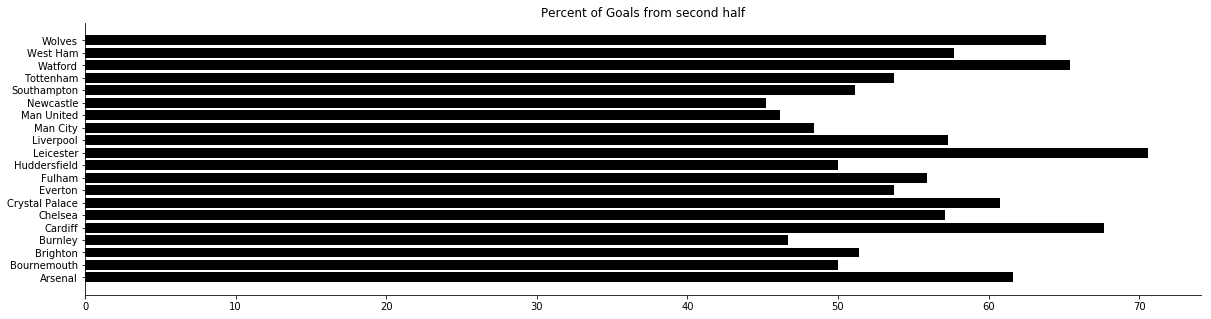

In [290]:
fig, ax = plt.subplots(figsize=(20,5))


ax.barh(PLHA.index ,PLHA['Goal % from Second half'], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_title('Percent of Goals from second half')

#Percentage of goals that teams scored in the second half

plt.show()

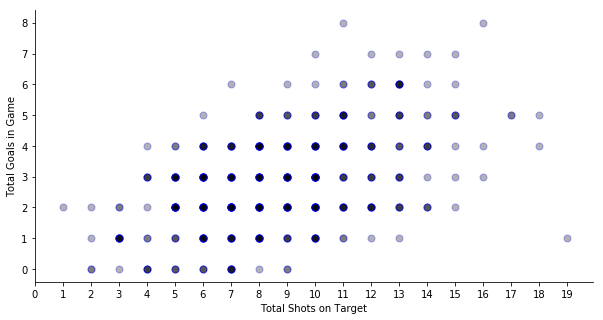

In [289]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(PL['TST'], PL['TG'],
           color='black' , 
         marker = '.', 
           edgecolor='blue',
           s = 200, alpha=0.3)

ax.set_ylabel('Total Goals in Game')
ax.set_xlabel('Total Shots on Target')
plt.xticks(np.arange(0, 20, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Total number of shots on target vs the total number of goals in the game

In [147]:
#PLHA.rename(index = {'Team':'HomeTeam'})
PLHA.index.names = ['Team']


In [162]:
PLHA.drop(['Goal % from Second half'], axis=1, inplace=True)

In [163]:
PLHA

,FTHG,HTHG,FTAG,HTAG,Total Goals,Half Time Goals,Goal % from First half
Team,,,,,,,
Arsenal,42,14,31,14,73,28,38.356164
Bournemouth,30,15,26,13,56,28,50.000000
Brighton,19,10,16,7,35,17,48.571429
Burnley,24,14,21,10,45,24,53.333333
Cardiff,21,8,13,3,34,11,32.352941
Chelsea,39,16,24,11,63,27,42.857143
Crystal Palace,19,8,32,12,51,20,39.215686
Everton,30,14,24,11,54,25,46.296296
Fulham,22,9,12,6,34,15,44.117647


In [286]:
PL[ (PL['HTR']=='H')] 

#How many games was the home team winning at half time?

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
0,E0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,...,1,0,0,3,0,3,3,1,10,Man United
1,E0,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1,0,0,2,0,2,2,1,5,Bournemouth
5,E0,11/8/2018,Watford,Brighton,2,0,H,1,0,H,...,2,0,0,4,0,4,2,1,5,Watford
8,E0,12/8/2018,Liverpool,West Ham,4,0,H,2,0,H,...,2,0,0,3,0,3,4,2,10,Liverpool
12,E0,18/08/2018,Everton,Southampton,2,1,H,2,0,H,...,5,0,0,5,0,5,3,2,11,Everton
13,E0,18/08/2018,Leicester,Wolves,2,0,H,2,0,H,...,1,1,0,3,1,4,2,2,5,Leicester
14,E0,18/08/2018,Tottenham,Fulham,3,1,H,1,0,H,...,0,0,0,0,0,0,4,1,14,Tottenham
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,2,0,0,8,0,8,3,1,10,Bournemouth
16,E0,19/08/2018,Brighton,Man United,3,2,H,3,1,H,...,1,0,0,2,0,2,5,4,6,Brighton
18,E0,19/08/2018,Man City,Huddersfield,6,1,H,3,1,H,...,2,0,0,2,0,2,7,4,15,Man City


In [285]:
PL[ (PL['HTR']=='H') & (PL['FTR']=='A')] 

#Out of the 126 games where the home team was winning at half time, the away team ended up winning only four times

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,TY,TR,TC,TG,HTTG,TST,Result
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,2,0,0,8,0,8,3,1,10,Bournemouth
194,E0,29/12/2018,Tottenham,Wolves,1,3,A,1,0,H,...,2,0,0,5,0,5,4,1,7,Wolves
214,E0,12/1/2019,Crystal Palace,Watford,1,2,A,1,0,H,...,4,0,0,5,0,5,3,1,8,Watford
228,E0,20/01/2019,Fulham,Tottenham,1,2,A,1,0,H,...,3,0,0,5,0,5,3,1,9,Tottenham
